# Import Libraries

https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5

In [1]:
!ln -s /usr/local/cuda-11.1/targets/x86_64-linux/lib/libcusolver.so.11.0.1.105 /usr/local/cuda-11.1/targets/x86_64-linux/lib/libcusolver.so.10

In [11]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
# from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
#from keras import backend as K
import os
import tensorflow as tf
import glob
from random import sample
from lime import lime_image
from PIL import Image, ImageFilter
from skimage.segmentation import mark_boundaries

# Predict an Image with Custom Model

In [4]:
test_normal = glob.glob('/home/cdsw/data/test/normal/*')
test_pneumonia = glob.glob('/home/cdsw/data/test/virus/*') + glob.glob('/home/cdsw/data/test/bacteria/*')
sample_image_set = sample(test_normal,4) + sample(test_pneumonia,4)

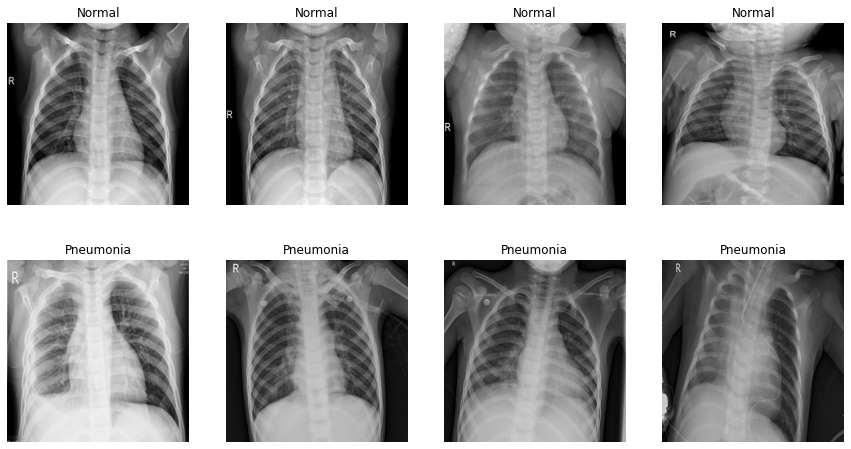

In [7]:
plt.figure(figsize=(15, 8))
#for images, labels in train_ds.take(1):
for i,image_path in enumerate(sample_image_set):
    ax = plt.subplot(2, 4, i + 1)
    im = Image.open(image_path)
    im = im.resize((224,224),Image.ANTIALIAS)
    im = im.convert("RGB")
    plt.title("Normal" if i < 4  else "Pneumonia")
    plt.imshow(im)
    plt.axis("off")

# LIME with Custom Model

In [8]:
model_1 = tf.keras.models.load_model('/home/cdsw/models/model_1.h5')

In [9]:
explainer = lime_image.LimeImageExplainer()
explanations = []

for sample_image in sample_image_set:
    im = Image.open(sample_image)
    im = im.resize((224,224),Image.ANTIALIAS)
    im = im.convert("RGB")
    im_array = tf.keras.preprocessing.image.img_to_array(im)
    im_array = np.expand_dims(im_array, axis=0)
    explanations.append(explainer.explain_instance(im_array[0].astype('double'), model_1.predict))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


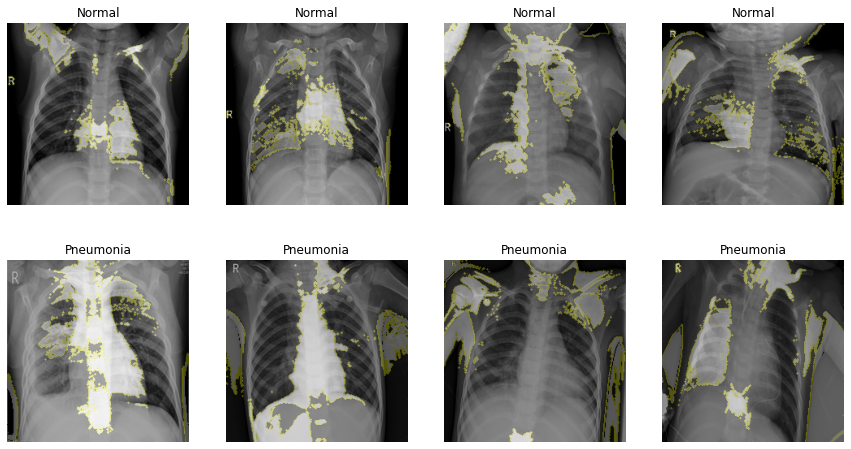

In [14]:
plt.figure(figsize=(15, 8))
for i,image_path in enumerate(sample_image_set):
    ax = plt.subplot(2, 4, i + 1)
    temp_1, mask_1 = explanations[i].get_image_and_mask(explanations[i].top_labels[0], positive_only=True, num_features=10, hide_rest=True)
    im = Image.open(image_path)
    im = im.resize((224,224),Image.ANTIALIAS)
    im = im.convert("RGB")
    plt.imshow(im)
    plt.imshow(mark_boundaries(temp_1, mask_1),alpha=.3)
    plt.title("Normal" if i < 4  else "Pneumonia")
    #plt.imshow(im)
    plt.axis("off")